In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.shape

(87240, 31)

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87240 entries, 0 to 87239
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    87240 non-null  int64  
 1   V1      87240 non-null  float64
 2   V2      87240 non-null  float64
 3   V3      87240 non-null  float64
 4   V4      87240 non-null  float64
 5   V5      87239 non-null  float64
 6   V6      87239 non-null  float64
 7   V7      87239 non-null  float64
 8   V8      87239 non-null  float64
 9   V9      87239 non-null  float64
 10  V10     87239 non-null  float64
 11  V11     87239 non-null  float64
 12  V12     87239 non-null  float64
 13  V13     87239 non-null  float64
 14  V14     87239 non-null  float64
 15  V15     87239 non-null  float64
 16  V16     87239 non-null  float64
 17  V17     87239 non-null  float64
 18  V18     87239 non-null  float64
 19  V19     87239 non-null  float64
 20  V20     87239 non-null  float64
 21  V21     87239 non-null  float64
 22

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,87240.000000,87240.000000,87240.000000,87240.000000,87240.000000,87239.000000,87239.000000,87239.000000,87239.000000,87239.000000,...,87239.000000,87239.000000,87239.000000,87239.000000,87239.000000,87239.000000,87239.000000,87239.000000,87239.000000,87239.000000
mean,39208.302212,-0.264415,-0.039672,0.679463,0.163042,-0.277593,0.094179,-0.110135,0.054041,-0.025376,...,-0.029472,-0.106031,-0.037054,0.009686,0.132652,0.026722,0.000801,0.002105,98.400990,0.002350
std,15846.338289,1.876993,1.667305,1.359385,1.360959,1.372054,1.302524,1.233574,1.217704,1.131867,...,0.729483,0.635050,0.624121,0.594797,0.441065,0.496992,0.390442,0.327910,267.389535,0.048419
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,31867.750000,-1.028026,-0.603069,0.184406,-0.720243,-0.897262,-0.645804,-0.602405,-0.140723,-0.691868,...,-0.223746,-0.525484,-0.177939,-0.321974,-0.131957,-0.326135,-0.063559,-0.005877,7.680000,0.000000
50%,41579.000000,-0.261473,0.070422,0.762151,0.186247,-0.312307,-0.155825,-0.071350,0.070699,-0.100498,...,-0.057635,-0.081403,-0.049749,0.065023,0.171178,-0.071981,0.009300,0.023036,26.990000,0.000000
75%,51578.500000,1.152808,0.726160,1.389214,1.039812,0.256678,0.488780,0.417652,0.353244,0.595250,...,0.118528,0.309661,0.080971,0.406151,0.420203,0.306278,0.082638,0.076227,89.900000,0.000000
max,61596.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,18.946734,4.014444,5.525093,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
df.duplicated().sum()

319

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(87240, 31)

In [ ]:
df['Class'].unique()

array([ 0.,  1., nan])

In [ ]:
df['Class'].value_counts()

Class
0.0    87034
1.0      205
Name: count, dtype: int64

In [ ]:
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]
normal_percentage = len(normal)/(len(fraud)+len(normal))
fraud_percentage = len(fraud)/(len(fraud)+len(normal))
print('Percentage of fraud transactions = ', round(fraud_percentage * 100, 3))
print('Percentage of normal transactions = ', round(normal_percentage * 100, 3))

Percentage of fraud transactions =  0.235
Percentage of normal transactions =  99.765


<ipython-input-19-2db7daf10a38>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Class',palette=['blue', 'red'])


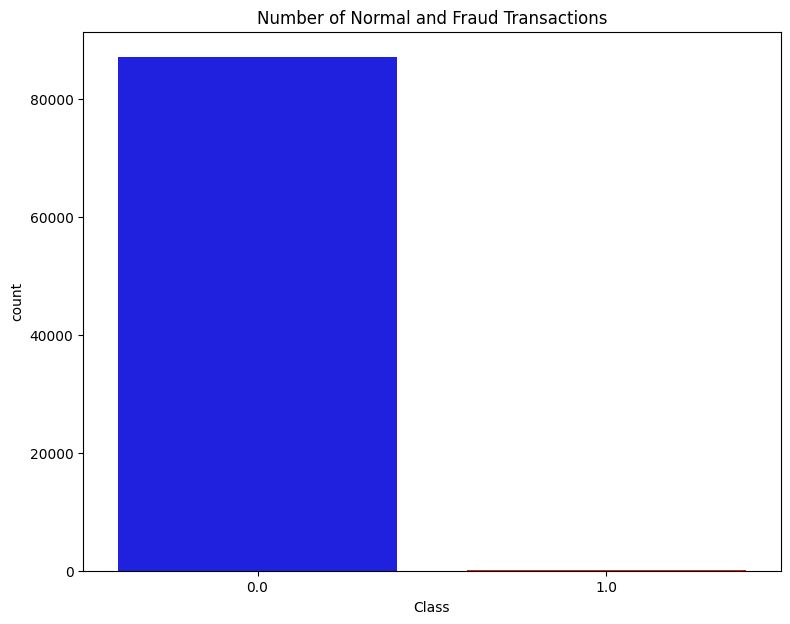

In [ ]:
plt.figure(figsize=(9,7))
sns.countplot(data=df,x='Class',palette=['blue', 'red'])
plt.title("Number of Normal and Fraud Transactions");

<Figure size 800x600 with 0 Axes>

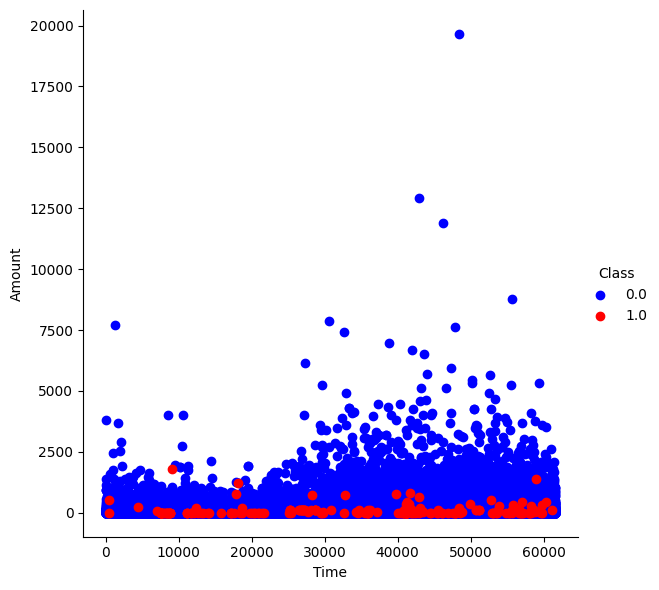

In [ ]:
plt.figure(figsize=(8,6))
sns.FacetGrid(df, hue="Class", height=6,palette=['blue','red']).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

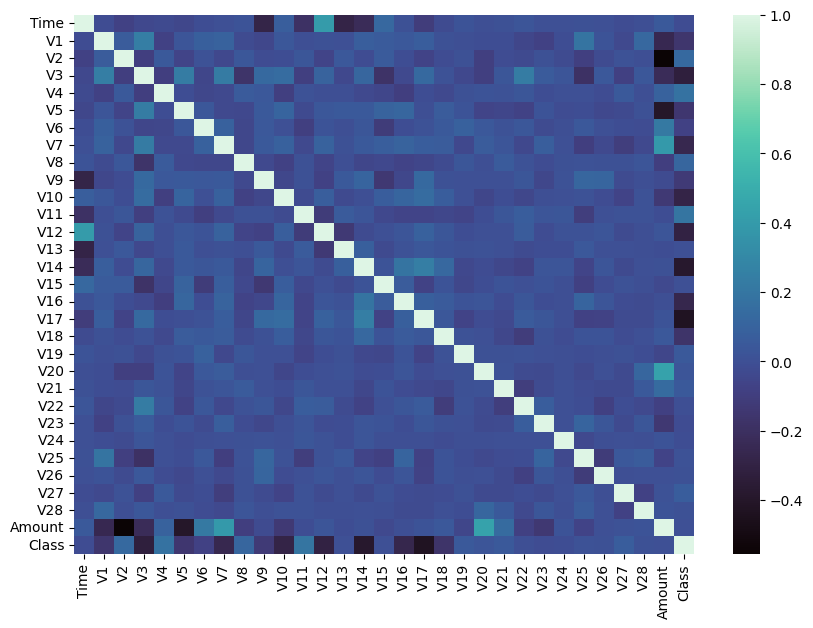

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data=df.corr(),cmap='mako')
plt.show()

In [ ]:
X = df.drop('Class',axis=1)
y = df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
def model_train_test(model,X_train,y_train,X_test,y_test):
  model.fit(X_train,y_train)
  prediction = model.predict(X_test)
  print('Accuracy = {}'.format(accuracy_score(y_test,prediction)))
  print(classification_report(y_test,prediction))
  matrix = confusion_matrix(y_test,prediction)
  dis = ConfusionMatrixDisplay(matrix)
  dis.plot()
  plt.show()

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
model_train_test(rf_model,X_train,y_train,X_test,y_test)

<ipython-input-41-1e6cfde5fa19>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


y_test type: <class 'numpy.ndarray'>
Prediction type: <class 'numpy.float64'>


ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [ ]:
Decision_tree = DecisionTreeClassifier()

In [ ]:
model_train_test(Decision_tree,X_train,y_train,X_test,y_test)

y_test type: <class 'numpy.ndarray'>
Prediction type: <class 'numpy.float64'>


ValueError: Classification metrics can't handle a mix of continuous and binary targets